# ÖDEV 1: PCA yardımı ile Classification,

Bu ödevde "Credit Risk Prediction" veri setini kullanacağız. Amacımız, verinin boyut sayısını düşürerek olabildiğince yüksek accuracy değerini alabilmek. Aşağıda verinin okunma ve temizlenme kısmını hazırlayıp vereceğim. Devamında ise yapmanız gerekenler:

1. PCA kullanarak verinin boyutunu düşürmek
    * Önce explained varience ratio değerini inceleyerek veriyi kaç boyuta düşürebileceğini kontrol et.
    * Daha sonra farklı boyutlarda denemeler yaparak boyutu düşürülmüş verileri elde et.
2. Classification modellerini dene
    * Logistic Regression
    * Random Forest
    * ve eğer istersen herhangi bir modelle daha

İsteğe bağlı olarak, verinin boyutunu düşürmek için diğer yöntemleri de kullanıp en yüksek accuracy değerini almayı deneyebilirsin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df: pd.DataFrame = pd.read_csv('./credit_risk_dataset.csv')

In [3]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Null değerleri sütun ortalaması ile dolduruyoruz
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [5]:
df.duplicated().sum()

165

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [8]:
# Outlier temizliği
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [9]:
# Kategorik verileri alıyoruz ve one hot encoding haline getiriyoruz
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [10]:
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)

In [11]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [12]:
# Verileri train ve test olarak ikiye ayırıyoruz

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

In [13]:
from sklearn.decomposition import PCA

In [14]:
#importing and fitting PCA
pca = PCA()
X_reconstruct = pca.fit_transform(X)

In [15]:
#shape of dataset
pca.components_.shape

(26, 26)

In [16]:
pca.explained_variance_ratio_

array([9.87172378e-01, 1.28275928e-02, 1.84908111e-08, 5.38665689e-09,
       3.36822929e-09, 9.91999801e-10, 1.45298012e-10, 1.26578503e-10,
       6.87390238e-11, 6.80322915e-11, 6.49009692e-11, 6.20949120e-11,
       5.91916321e-11, 5.05450070e-11, 4.17747291e-11, 3.70992460e-11,
       2.14124883e-11, 7.92954529e-12, 2.74169803e-12, 1.63947111e-12,
       1.54524841e-12, 7.78274858e-13, 9.66102379e-33, 9.66102379e-33,
       9.66102379e-33, 9.66102379e-33])

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98717238, 0.99999997, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [18]:
#reduction the dimension 26 to 4
pca = PCA(n_components=4)
X4D = pca.fit_transform(X)

In [19]:
X4D[:3]

array([[-5.65839594e+04,  6.41342435e+03, -6.42357893e+00,
         1.82960813e+00],
       [-5.64102832e+04,  1.91677711e+03, -3.02843891e+00,
        -2.89917566e+00],
       [ 5.86611790e+02, -2.54038006e+04, -6.38583582e+00,
        -1.48935960e+00]])

In [20]:
#reconstruction of the 4 dimension dataset
X_reconstructed = pca.inverse_transform(X4D)

In [21]:
X_reconstructed

array([[ 2.11566065e+01,  9.60000000e+03,  4.87198086e+00, ...,
        -1.28716797e-03,  8.57417722e-01,  1.42582278e-01],
       [ 2.44807564e+01,  9.60000000e+03,  8.17985881e-01, ...,
         8.00645704e-04,  8.02413924e-01,  1.97586076e-01],
       [ 2.26617421e+01,  6.55000000e+04,  3.67658233e+00, ...,
         1.18801591e-02,  7.43537039e-01,  2.56462961e-01],
       ...,
       [ 6.45285575e+01,  7.60000000e+04,  3.45602311e+00, ...,
         1.35677368e-02,  6.78265408e-01,  3.21734592e-01],
       [ 5.71965749e+01,  1.50000000e+05,  5.06633272e+00, ...,
         4.70873348e-03,  7.69096202e-01,  2.30903798e-01],
       [ 6.61238494e+01,  4.20000000e+04,  2.28961143e+00, ...,
         2.63148760e-03,  7.50808221e-01,  2.49191779e-01]])

In [22]:
np.mean(np.sum(np.square(X_reconstructed - X), axis = 1))

14.3272126321373

In [23]:
pca.components_.shape

(4, 26)

In [24]:
np.sum(pca.explained_variance_ratio_)

0.9999999948794709

In [25]:
cumsum_data = np.cumsum(pca.explained_variance_ratio_)

In [26]:
x_tick = np.arange(1, len(cumsum_data)+1,1)

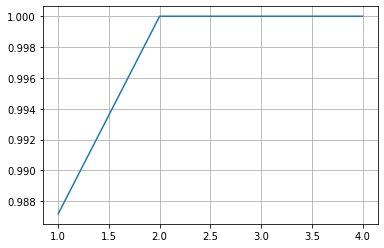

In [27]:
#visualizing of the cumulative sum of pca 
plt.grid(True)
plt.plot(x_tick,cumsum_data)

In [28]:
#reduction the dimension 26 to 2
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D[:3]

array([[-56583.95937263,   6413.42435118],
       [-56410.28321748,   1916.77711347],
       [   586.61179031, -25403.8005508 ]])

In [29]:
#reconstruction of the 2 dimension dataset
X_reconstructed = pca.inverse_transform(X2D)
X_reconstructed

array([[ 2.67451946e+01,  9.59999989e+03,  3.81565916e+00, ...,
        -1.00966367e-03,  8.39466757e-01,  1.60533243e-01],
       [ 2.67803310e+01,  9.59999992e+03,  4.01354197e+00, ...,
         7.67527721e-04,  8.27412074e-01,  1.72587926e-01],
       [ 2.79227048e+01,  6.54999999e+04,  5.87471562e+00, ...,
         1.20118503e-02,  7.55118519e-01,  2.44881481e-01],
       ...,
       [ 2.80940174e+01,  7.60000008e+04,  5.98064388e+00, ...,
         1.19355601e-02,  7.56382950e-01,  2.43617050e-01],
       [ 2.91452017e+01,  1.50000001e+05,  5.84770670e+00, ...,
         3.49926739e-03,  8.18870549e-01,  1.81129451e-01],
       [ 2.73165655e+01,  4.20000008e+04,  4.38328093e+00, ...,
         9.17176165e-04,  8.28701899e-01,  1.71298101e-01]])

In [30]:
np.mean(np.sum(np.square(X_reconstructed - X), axis = 1))

81.13622475979089

In [31]:
pca.components_.shape

(2, 26)

In [32]:
np.sum(pca.explained_variance_ratio_)

0.9999999710020024

In [33]:
cumsum_data = np.cumsum(pca.explained_variance_ratio_)

In [34]:
x_tick = np.arange(1, len(cumsum_data)+1,1)

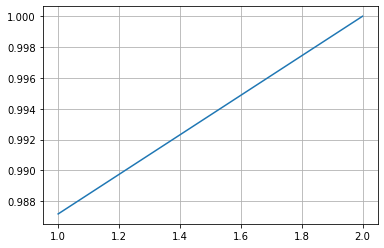

In [35]:
#visualizing of the cumulative sum of pca
plt.grid(True)
plt.plot(x_tick,cumsum_data)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [38]:
#organizing the data to test
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [39]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (26, 25927)
x_test (26, 6482)
y_train (25927,)
y_test (6482,)


In [40]:
#logistic regression accuracy calculation
log_r = LogisticRegression()
log_r.fit(x_train.T, y_train.T)
print("test accuracy {}".format(log_r.score(x_test.T,y_test.T)))

test accuracy 0.804689910521444


In [41]:
#train_test_split data once again
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.15,random_state = 42)

In [42]:
#decision tree accuracy calculation
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("score: ", dt.score(x_test,y_test))

score:  0.8951048951048951


In [43]:
#random forest accuracy calculation
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9354175236528177


In [44]:
#Cause of the data number we need to reduce the number of data. Because while visualizing so much ram needed.
df = df.sample(frac=0.3)

In [45]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [46]:
#train_test_split once again for visualize
split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

In [47]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS

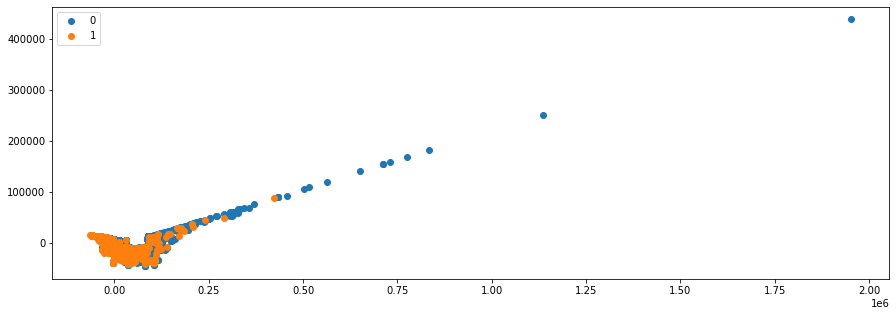

In [48]:
#visualizing with Isomap
isomap = Isomap(n_components = 2)
X2D = isomap.fit_transform(X)
figure = plt.figure(1,(15,5))

for label in set(y):
    data = X2D[y==label]
    plt.scatter(data[:,0],data[:,1], label = label)
plt.legend()
plt.show()

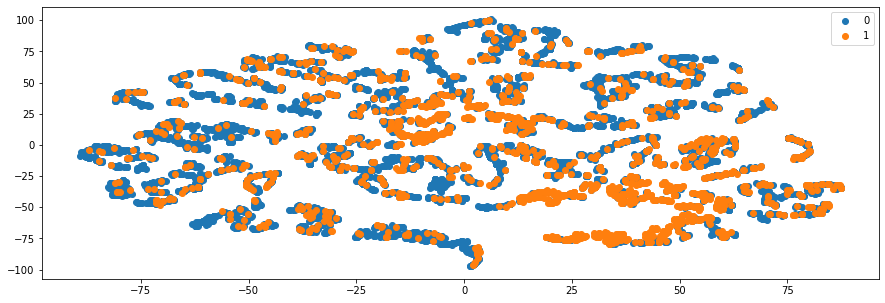

In [49]:
#visualizing with TSNE
tsne = TSNE(n_components = 2)
X_2D = tsne.fit_transform(X)
figure = plt.figure(1,(15,5))

for label in set(y):
    data = X_2D[y==label]
    plt.scatter(data[:,0],data[:,1], label = label)
plt.legend()
plt.show()

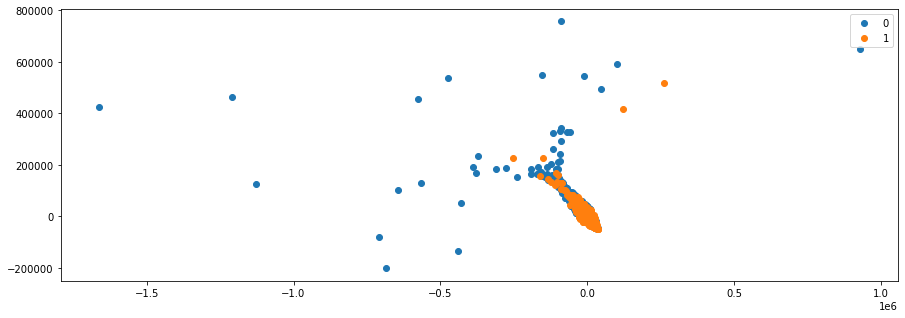

In [50]:
#visualizing with MDS
mds = MDS(n_components=2)
X2D = mds.fit_transform(X)
figure = plt.figure(1,(15,5))
for label in set(y):
    data = X2D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

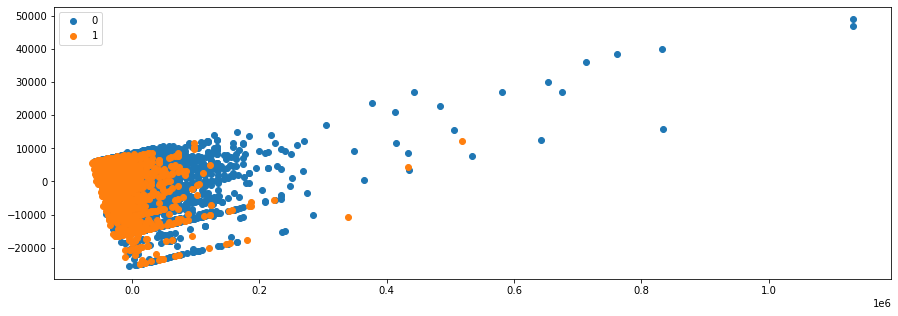

In [50]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X,y)
figure = plt.figure(1,(15,5))
for label in set(y):
    data = X2D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()


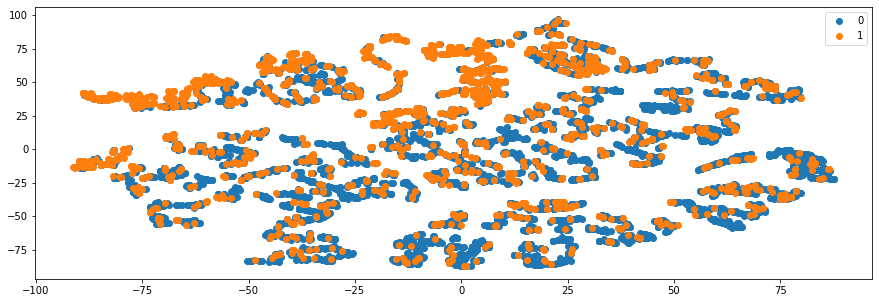

In [51]:
"""It is highly recommended to use another dimensionality reduction
    method (e.g. PCA for dense data or TruncatedSVD for sparse data)
    to reduce the number of dimensions to a reasonable amount (e.g. 50)
    if the number of features is very high. This will suppress some
    noise and speed up the computation of pairwise distances between
    samples. For more tips see Laurens van der Maaten's FAQ [2]. 
    (From Sklearn documentation)"""

pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(X,y)


tsne = TSNE(n_components=2)
X2D = tsne.fit_transform(X_reduced)

figure = plt.figure(1,(15,5))
for label in set(y):
    data = X2D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()